In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np


In [3]:
from experiments import OptimalSensorChoice
from experiments import utilities as utils
from bayesinverse import Regression
from robiplotipy import PlotEnv
import robiplotipy.experiments.optimal_sensor_choice as plt_exp


/home/atmo/bin/anaconda3/envs/rmaiwald_dev/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
config_path = config_path = Path(
    "/home/rmaiwald/code/Experiments/experiments/optimal_sensor_choice/config.yaml"
)

exp = OptimalSensorChoice(config_path)


sensors 0.023915335536003113
emissions 2.8684128522872925
transport 18.999645367264748


In [5]:
exp.config


{'seed': 2,
 'time': 720,
 'transport': {'mode': 'realistic'},
 'sensors': {'n_sensors': 30, 'height': 0, 'noise': 1.0},
 'emissions': {'prior_mode': 'single_time',
  'prior': 'mean_TNO_with_points',
  'prior_variance': 'mean_TNO_variance',
  'truth_mode': 'single_time',
  'truth': 'combined_emissions'},
 'reader': {'catalog_path': '/mnt/data/users/rmaiwald/GRAMM-GRAL/gral/gramm_catalog/',
  'config_path': '/mnt/data/users/rmaiwald/GRAMM-GRAL/gral/gral_sim_path_05/config/',
  'simulation_path': '/mnt/data/users/rmaiwald/GRAMM-GRAL/gral/gral_sim_path_05/'},
 'paths': {'data_jar': '/home/rmaiwald/results/paper/experiments/'}}

In [6]:
np.sqrt(np.mean((exp.emissions.truth_absolute - exp.emissions.prior_absolute) ** 2))


<xarray.DataArray ()>
array(3784.55527591)

In [7]:
exp.load_data()
data_xr = exp.data["data"]
data_xr["rmse"].attrs["units"] = "kg/h"
data_xr["rmse"].attrs["long_name"] = "RMSE of the emissions"

data_xr["information"].attrs["units"] = ""
data_xr["information"].attrs["long_name"] = "Information content"

data_xr["relative_improvement"].attrs["units"] = "%"
data_xr["relative_improvement"].attrs["long_name"] = "Relative improvement"

data_xr["error_reduction"].attrs["units"] = "%"
data_xr["error_reduction"].attrs["long_name"] = "Relative error reduction"

data_xr["std"].attrs["units"] = "ppm"
data_xr["std"].attrs["long_name"] = "Sensor noise"

data_xr["n_sensors"].attrs["long_name"] = "Number of sensors"


In [8]:
# Compute RMSE divided by mean emissions
mean_emissions = exp.emissions.truth_absolute.mean()
data_xr["rel_rmse"] = data_xr["rmse"] / mean_emissions * 100
data_xr["rel_rmse"].attrs["units"] = "%"
data_xr["rel_rmse"].attrs[
    "long_name"
] = "RMSE of the emissions relative to the mean emissions"


Plotting

In [9]:
print(
    "Error from prior: {:.2f}".format(
        (
            np.abs(
                exp.emissions.prior_absolute.sum() - exp.emissions.truth_absolute.sum()
            )
            / np.sum(exp.emissions.truth_absolute)
        ).values
        * 100
    )
)


Error from prior: 13.49


In [10]:
plot_env = PlotEnv(
    fig_path="/home/rmaiwald/results/plotting/optimal_sensor_choice/",
    logging=True,
    display=True,
)


[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/rmse_contourf/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/rel_rmse_contourf/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/information_contourf/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/relative_improvement_contourf/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/error_reduction_contourf/config_log.yml'


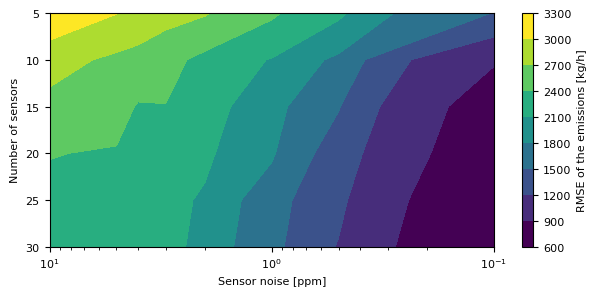

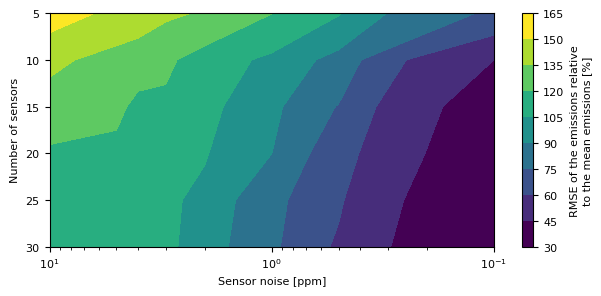

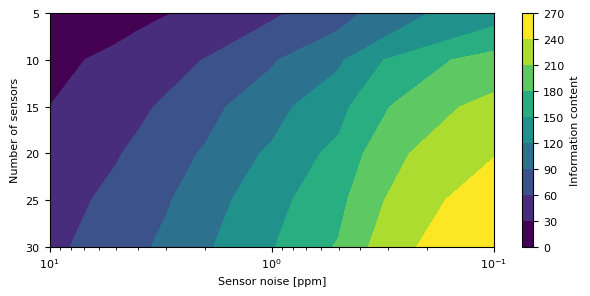

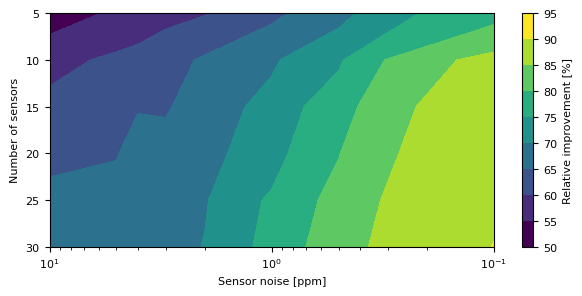

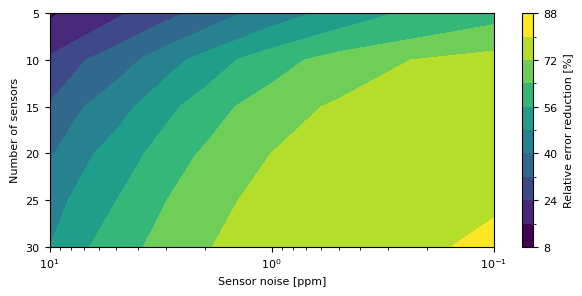

In [11]:
name_list = [
    "rmse",
    "rel_rmse",
    "information",
    "relative_improvement",
    "error_reduction",
]

for name in name_list:
    with plot_env(
        name=name + "_contourf",
        notes=exp.config,
    ):
        plt_exp.plot_contourf(
            env=plot_env,
            data_array=data_xr[name],
        )


[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/rmse_pcm/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/rel_rmse_pcm/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/information_pcm/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/relative_improvement_pcm/config_log.yml'
[Errno 17] File exists: '/home/rmaiwald/results/plotting/optimal_sensor_choice/error_reduction_pcm/config_log.yml'


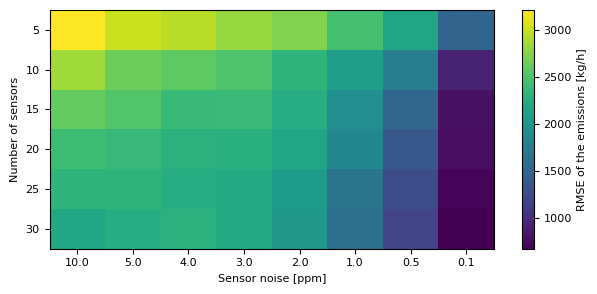

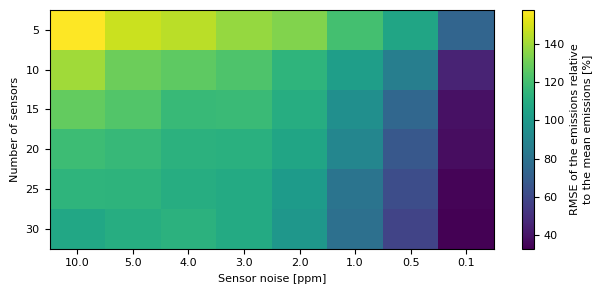

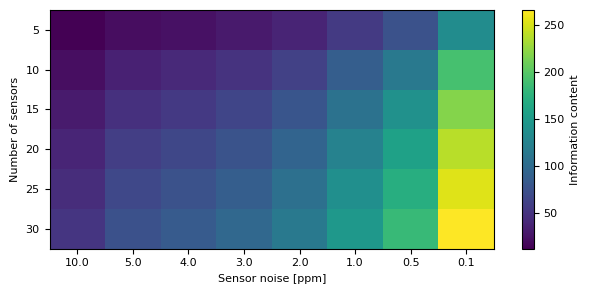

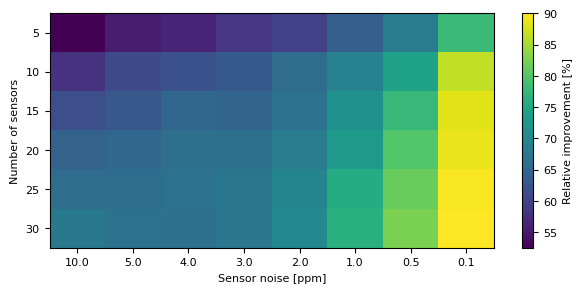

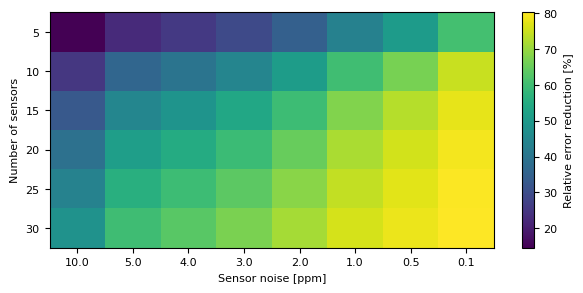

In [12]:
name_list = [
    "rmse",
    "rel_rmse",
    "information",
    "relative_improvement",
    "error_reduction",
]

for name in name_list:
    with plot_env(
        name=name + "_pcm",
        notes=exp.config,
    ):
        plt_exp.plot_pcm(
            env=plot_env,
            data_array=data_xr[name],
        )
